<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/advance_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Array vs Python List

In [3]:
# python list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]
import time
c = []
start = time.time()
for i in range(len(a)):
  c.append(a[i] +b[i])
print(time.time()-start)

3.3178083896636963


In [6]:
# Numpy array
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a+b
print(time.time()-start)

0.03305697441101074


In [7]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [10]:
a = np.arange(10000000,dtype = np.int16)
sys.getsizeof(a)

20000112

# Advance Indexing

In [17]:
# normal indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [18]:
a[1,2]

np.int64(6)

In [19]:
# fancy indexing
import numpy as np

# let say you need 1st , 3rd and 4th row

a[[0,2,3]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [20]:
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [21]:
a[:,[0,2,3]]  # extracting column

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [23]:
# Boolean indexing
import numpy as np

a = np.random.randint(1,100,24).reshape(6,4)
a

array([[37, 58, 83, 43],
       [14, 75, 86, 95],
       [56, 48, 88, 12],
       [71, 70, 83,  9],
       [13, 67, 34,  1],
       [99, 96, 57, 84]])

In [26]:
# find all the number greater than 50
# a > 50
a[a>50]   # boolean mask

array([58, 83, 75, 86, 95, 56, 88, 71, 70, 83, 67, 99, 96, 57, 84])

In [27]:
# find out even number
a[a%2 ==0 ]

array([58, 14, 86, 56, 48, 88, 12, 70, 34, 96, 84])

In [31]:
# find all the numbers greater than 50 and even
a[(a%2 == 0)&(a>50)]

array([58, 86, 56, 88, 70, 96, 84])

In [32]:
# find all the numbers not divisible by 7
a [a% 7 != 0 ]

array([37, 58, 83, 43, 75, 86, 95, 48, 88, 12, 71, 83,  9, 13, 67, 34,  1,
       99, 96, 57])

In [33]:
# find all the numbers not divisible by 7
a [~(a% 7 == 0) ]

array([37, 58, 83, 43, 75, 86, 95, 48, 88, 12, 71, 83,  9, 13, 67, 34,  1,
       99, 96, 57])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [36]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [37]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [39]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print (a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [40]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print (a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [41]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [42]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [43]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a+b)

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [44]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a+b)

ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

# working with mathmetical formula


In [47]:
# sigmoid in logistic regression
def sigmoid(num):
  return 1/(1+np.exp(-num))


a = np.arange(10)
a
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [49]:
# mean squared error for linear regression
actual = np.random.randint(1,50,25)
predicted  = np.random.randint(1,50,25)

actual


array([34, 36, 40, 31, 37, 36, 14,  5,  9, 20, 13, 25, 33, 25, 31, 32, 30,
        8, 42, 13, 17,  5, 41, 24, 21])

In [50]:
predicted

array([34, 36, 40, 31, 37, 36, 14,  5,  9, 20, 13, 25, 33, 25, 31, 32, 30,
        8, 42, 13, 17,  5, 41, 24, 21])

In [51]:
def mse(actual,predicted):
  return np.mean((actual-predicted)**2)

mse(actual,predicted)

np.float64(432.32)

# working wiht missing values


In [52]:
a = np.array([1,2,3,4,np.nan,6,7])
a

array([ 1.,  2.,  3.,  4., nan,  6.,  7.])

In [55]:
np.isnan(a)

array([False, False, False, False,  True, False, False])

In [56]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6., 7.])

# Plotting graph

In [58]:
x = np.linspace(-10,10,100)
y = x

In [59]:
y

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

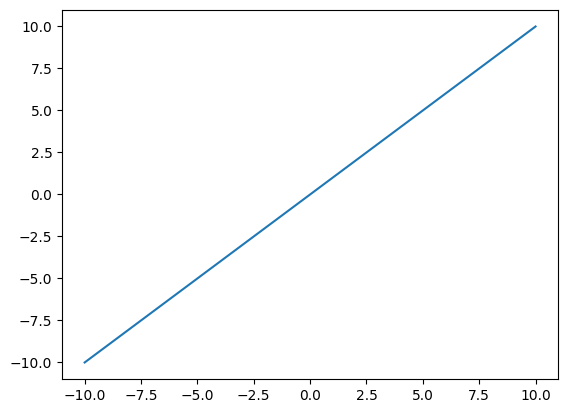

In [60]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [61]:
# y = x^2
x = np.linspace(-50,50,100)
y = x**2

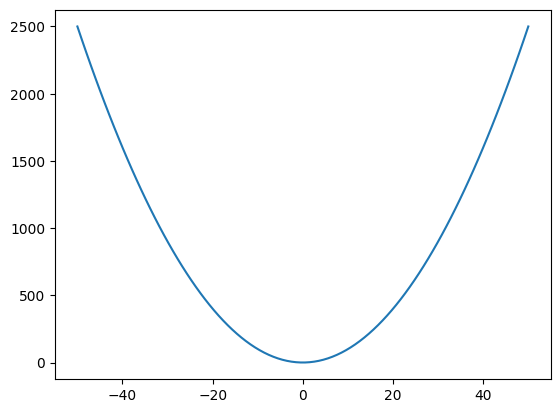

In [62]:
plt.plot(x,y)

In [63]:
x = np.linspace(-10,10,100)
y = np.sin(x)

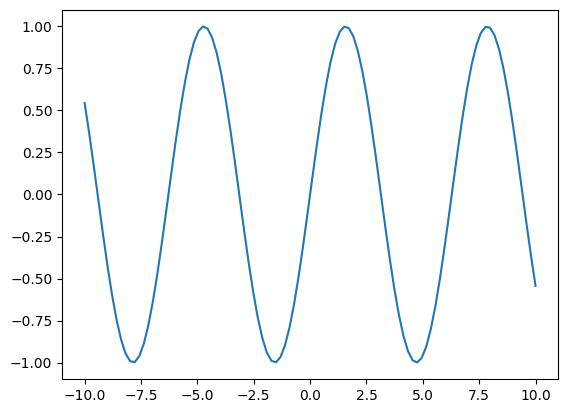

In [64]:
plt.plot(x,y)

In [65]:
x = np.linspace(-10,10,100)
y = x*np.log(x)

<ipython-input-65-61c11fbffcf5>:2: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


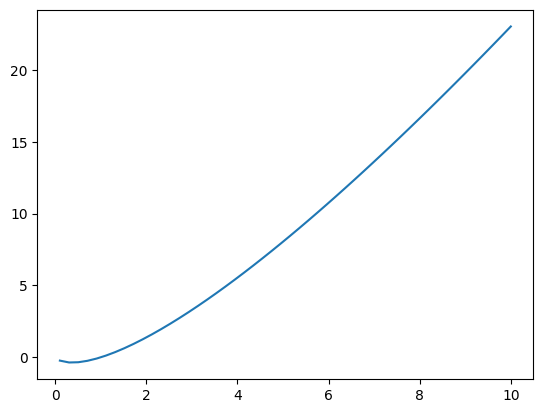

In [66]:
plt.plot(x,y)